In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data  = pd.read_csv("insurance.csv")

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.shape

(1338, 7)

In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
#Pre-Processing
#need to convert the string values to int
#LabelEncoder sets numerical values for string values in data
from sklearn.preprocessing import LabelEncoder

In [9]:
label_encoder = LabelEncoder()
data["sex"] = label_encoder.fit_transform(data["sex"])

In [10]:
#fit_transform algorithim sets numerical values, and tranforms the data in the set
#the sex column can be seen now with zeroes and ones instead of the original male and female
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [11]:
#encoding the rest of the columns
data["smoker"] = label_encoder.fit_transform(data["smoker"])
data["region"] = label_encoder.fit_transform(data["region"])

In [12]:
#all columns are now numerical values
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [13]:
#value that the model will predict
#dependent data
#iloc selects the rows and columns being used
y = data.iloc[:, -1].values
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [14]:
#data that will be used to predict the output
#independent data
x = data.iloc[:, :-1].values
x

array([[19.  ,  0.  , 27.9 ,  0.  ,  1.  ,  3.  ],
       [18.  ,  1.  , 33.77,  1.  ,  0.  ,  2.  ],
       [28.  ,  1.  , 33.  ,  3.  ,  0.  ,  2.  ],
       ...,
       [18.  ,  0.  , 36.85,  0.  ,  0.  ,  2.  ],
       [21.  ,  0.  , 25.8 ,  0.  ,  0.  ,  3.  ],
       [61.  ,  0.  , 29.07,  0.  ,  1.  ,  1.  ]])

In [15]:
#Training the model
from sklearn.model_selection import train_test_split

In [16]:
#train_test_split function returns 4 outputs
#train_size sets 80% of the data towards our training data set and 20% towards our testing data set
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8)

In [17]:
x_train.shape

(1070, 6)

In [18]:
x_test.shape

(268, 6)

In [19]:
#untrained model
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()

In [20]:
#introducing our training data to our untrained model
reg_model.fit(x_train, y_train)

LinearRegression()

In [22]:
#storing our predictions in y_pred
y_pred = reg_model.predict(x_test)
y_pred

array([11293.50060246, 32253.6149733 , 12178.96301179, 11488.96349829,
       25369.40120621, 17009.41386893, 28656.3683896 , 16787.77001235,
       12336.23086609, 33427.466704  ,  7722.14519037,  5260.0605035 ,
        6914.9093502 , 15273.33254915, 11515.05220202,  6858.45392016,
       15876.38468635, 16482.1418977 ,  7915.35101422,  3238.40019672,
       13388.05681807, 34319.95436886,  7871.12648811, 14632.2280591 ,
       15176.90333571, 10647.37454347, 14941.589328  ,   327.98334108,
        7196.28612432, 15587.33405943, 11071.19110788, 16233.05145023,
        3274.13611188,  5065.16103354, 13562.23595311,  7171.60690389,
        6288.97960621, 15391.74220792,  5705.67292723,  7805.14646141,
        9502.90561384, 18183.73742633,  9528.77010265,  9613.1541742 ,
       11605.13824561, 12906.71675573,  5298.83907829,   166.10813672,
        1650.63345119,  9102.06008562, 10289.90931746, 39230.80911369,
       13630.43285562, 15405.63838894, 28912.96804872, 11692.63435836,
      

In [23]:
#data table to compare actual to predicted value
comp = pd.DataFrame({"Prediction Data:": y_pred, "Actual Data:": y_test})
comp

,Prediction Data:,Actual Data:
0,11293.500602,13012.20865
1,32253.614973,38282.74950
2,12178.963012,9872.70100
3,11488.963498,12323.93600
4,25369.401206,15359.10450
...,...,...
263,29008.076595,34672.14720
264,5882.569115,4779.60230
265,10861.482653,9625.92000
266,38794.924608,45702.02235


In [25]:
#rmse shows how accurate the model is based on how close it is to the minimum and maximum values of the data
#if it is closer to the min, then the predictions have a lower error than if it is closer to the max
from sklearn.metrics import mean_squared_error
from math import sqrt
sqrt(mean_squared_error(y_test, y_pred))

5897.82838197059

C:\Users\knair\AppData\Local\Temp\ipykernel_7324\2799224457.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([y_pred], color = "purple", bins = 30)
C:\Users\knair\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


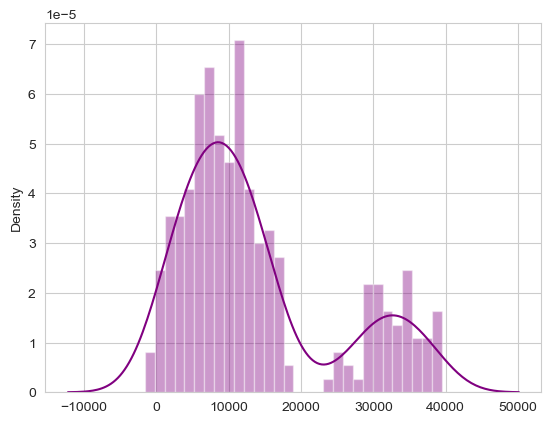

In [26]:
#skewed towards the minimum
import seaborn as sns
sns.set_style("whitegrid")

sns.distplot([y_pred], color = "purple", bins = 30)
plt.show()